# Class 9

###### 1. Data import and Data preparation
###### 2. Equally Weighted portfolio
###### 3. Minimum variance portfolio for a target level of expected return 
###### 4. Global Minimun Variance Portfolio
###### 5. Max sharpe ratio portfolio
###### 6. Efficient Portfolios and the Efficient frontier

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf     # To install it: "pip install yfinance --upgrade --no-cache-dir"
from datetime import date
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from matplotlib import cm
from pylab import rcParams 

##### 1. Data import and Data preparation

In [2]:
# Settings for data download

start_date = "2019-01-01"     # Start date for the download 
end_date = date.today().strftime("%Y-%m-%d")
assetList =["AAPL","AMZN","GOOGL", "TSLA", "NVDA","JPM"] 
n = len(assetList)

data_ = yf.download(assetList, start=start_date, end=end_date)#

[*********************100%***********************]  6 of 6 completed


In [3]:
data_.head() #

Price                      Adj Close                                   \
Ticker                          AAPL       AMZN      GOOGL        JPM   
Date                                                                    
2019-01-02 00:00:00+00:00  37.708588  76.956497  52.543530  82.916206   
2019-01-03 00:00:00+00:00  33.952541  75.014000  51.088303  81.737831   
2019-01-04 00:00:00+00:00  35.401951  78.769501  53.708797  84.751129   
2019-01-07 00:00:00+00:00  35.323147  81.475502  53.601692  84.810059   
2019-01-08 00:00:00+00:00  35.996529  82.829002  54.072483  84.650108   

Price                                               Close             \
Ticker                         NVDA       TSLA       AAPL       AMZN   
Date                                                                   
2019-01-02 00:00:00+00:00  3.378090  20.674667  39.480000  76.956497   
2019-01-03 00:00:00+00:00  3.173995  20.024000  35.547501  75.014000   
2019-01-04 00:00:00+00:00  3.377345  21.179333  37.064999  78.769501   
2019-01-07 00:00:00+00:00  3.556146  22.330667  36.982498  81.475502   
2019-01-08 00:00:00+00:00  3.467613  22.356667  37.687500  82.829002   

Price                                             ...       Open              \
Ticker                         GOOGL         JPM  ...      GOOGL         JPM   
Date                                              ...                          
2019-01-02 00:00:00+00:00  52.734001   99.309998  ...  51.360001   95.949997   
2019-01-03 00:00:00+00:00  51.273499   97.110001  ...  52.533501   98.639999   
2019-01-04 00:00:00+00:00  53.903500  100.690002  ...  52.127998   99.110001   
2019-01-07 00:00:00+00:00  53.796001  100.760002  ...  54.048500  100.430000   
2019-01-08 00:00:00+00:00  54.268501  100.570000  ...  54.299999  101.629997   

Price                                             Volume                       \
Ticker                        NVDA       TSLA       AAPL       AMZN     GOOGL   
Date                                                                            
2019-01-02 00:00:00+00:00  3.26600  20.406668  148158800  159662000  31868000   
2019-01-03 00:00:00+00:00  3.34475  20.466667  365248800  139512000  41960000   
2019-01-04 00:00:00+00:00  3.27350  20.400000  234428400  183652000  46022000   
2019-01-07 00:00:00+00:00  3.46250  21.448000  219111200  159864000  47446000   
2019-01-08 00:00:00+00:00  3.66725  22.797333  164101200  177628000  35414000   

Price                                                      
Ticker                          JPM       NVDA       TSLA  
Date                                                       
2019-01-02 00:00:00+00:00  15670900  508752000  174879000  
2019-01-03 00:00:00+00:00  16286400  705552000  104478000  
2019-01-04 00:00:00+00:00  16935200  585620000  110911500  
2019-01-07 00:00:00+00:00  15430700  709160000  113268000  
2019-01-08 00:00:00+00:00  13578800  786016000  105127500  

[5 rows x 36 columns]

In [4]:
data = data_["Close"]                               # Select closing prices
data.head() #

Ticker,AAPL,AMZN,GOOGL,JPM,NVDA,TSLA
Date,,,,,,
2019-01-02 00:00:00+00:00,39.480000,76.956497,52.734001,99.309998,3.40550,20.674667
2019-01-03 00:00:00+00:00,35.547501,75.014000,51.273499,97.110001,3.19975,20.024000
2019-01-04 00:00:00+00:00,37.064999,78.769501,53.903500,100.690002,3.40475,21.179333
2019-01-07 00:00:00+00:00,36.982498,81.475502,53.796001,100.760002,3.58500,22.330667
2019-01-08 00:00:00+00:00,37.687500,82.829002,54.268501,100.570000,3.49575,22.356667


In [5]:
data.tail()

Ticker,AAPL,AMZN,GOOGL,JPM,NVDA,TSLA
Date,,,,,,
2025-01-13 00:00:00+00:00,234.399994,218.460007,191.009995,244.210007,133.229996,403.309998
2025-01-14 00:00:00+00:00,233.279999,217.759995,189.660004,247.470001,131.759995,396.359985
2025-01-15 00:00:00+00:00,237.869995,223.350006,195.550003,252.350006,136.240005,428.220001
2025-01-16 00:00:00+00:00,228.259995,220.660004,192.910004,254.270004,133.570007,413.820007
2025-01-17 00:00:00+00:00,229.979996,225.940002,196.000000,259.160004,137.710007,426.500000


In [6]:
# Create the returns dataframe
ret = (data-data.shift(1))/data.shift(1) # Create returns dataframe
ret.tail()

Ticker,AAPL,AMZN,GOOGL,JPM,NVDA,TSLA
Date,,,,,,
2025-01-13 00:00:00+00:00,-0.010344,-0.002192,-0.005363,0.018093,-0.019719,0.021711
2025-01-14 00:00:00+00:00,-0.004778,-0.003204,-0.007068,0.013349,-0.011034,-0.017232
2025-01-15 00:00:00+00:00,0.019676,0.025671,0.031056,0.019720,0.034001,0.080382
2025-01-16 00:00:00+00:00,-0.040400,-0.012044,-0.013500,0.007608,-0.019598,-0.033628
2025-01-17 00:00:00+00:00,0.007535,0.023928,0.016018,0.019232,0.030995,0.030641


In [7]:
data.head()

Ticker,AAPL,AMZN,GOOGL,JPM,NVDA,TSLA
Date,,,,,,
2019-01-02 00:00:00+00:00,39.480000,76.956497,52.734001,99.309998,3.40550,20.674667
2019-01-03 00:00:00+00:00,35.547501,75.014000,51.273499,97.110001,3.19975,20.024000
2019-01-04 00:00:00+00:00,37.064999,78.769501,53.903500,100.690002,3.40475,21.179333
2019-01-07 00:00:00+00:00,36.982498,81.475502,53.796001,100.760002,3.58500,22.330667
2019-01-08 00:00:00+00:00,37.687500,82.829002,54.268501,100.570000,3.49575,22.356667


In [8]:
data.shift(1)

Ticker,AAPL,AMZN,GOOGL,JPM,NVDA,TSLA
Date,,,,,,
2019-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03 00:00:00+00:00,39.480000,76.956497,52.734001,99.309998,3.405500,20.674667
2019-01-04 00:00:00+00:00,35.547501,75.014000,51.273499,97.110001,3.199750,20.024000
2019-01-07 00:00:00+00:00,37.064999,78.769501,53.903500,100.690002,3.404750,21.179333
2019-01-08 00:00:00+00:00,36.982498,81.475502,53.796001,100.760002,3.585000,22.330667
...,...,...,...,...,...,...
2025-01-13 00:00:00+00:00,236.850006,218.940002,192.039993,239.869995,135.910004,394.739990
2025-01-14 00:00:00+00:00,234.399994,218.460007,191.009995,244.210007,133.229996,403.309998
2025-01-15 00:00:00+00:00,233.279999,217.759995,189.660004,247.470001,131.759995,396.359985


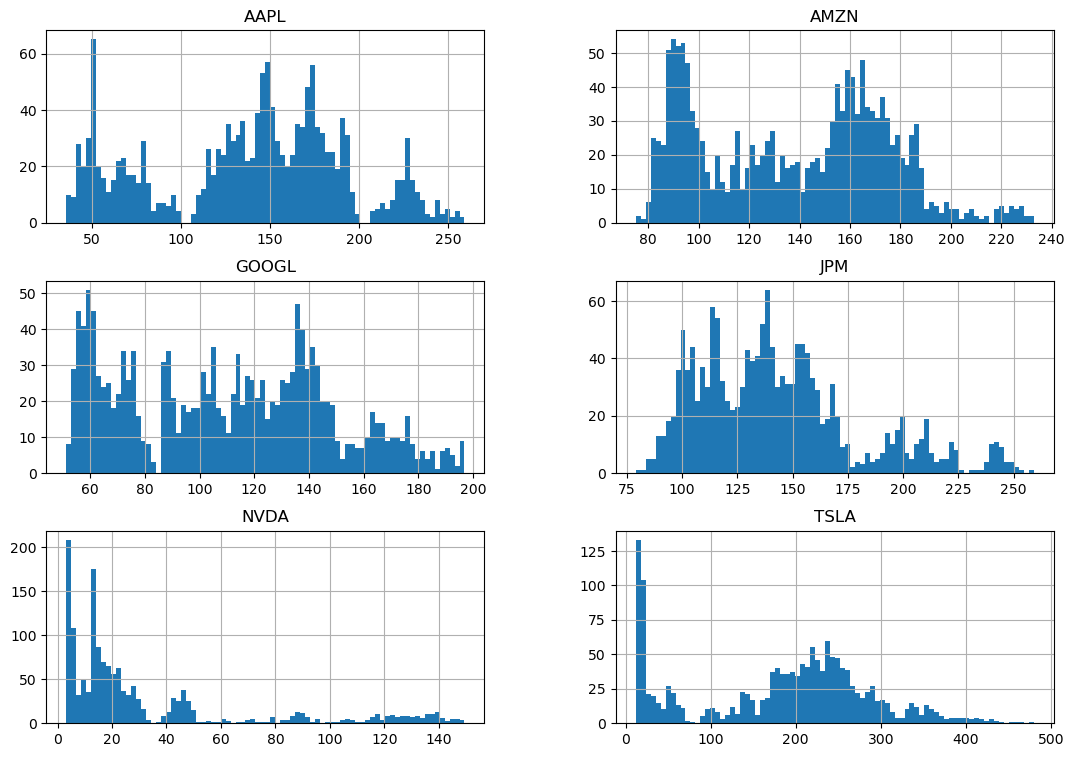

In [9]:
data.hist(bins = 80, figsize = (13, 9));

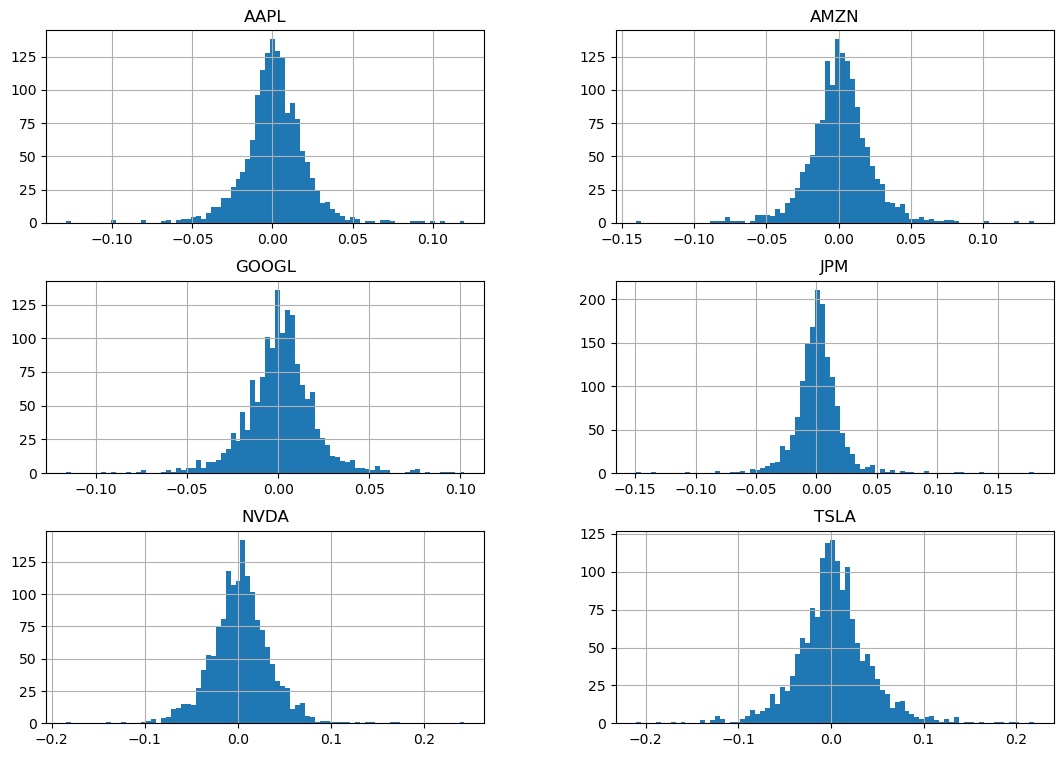

In [10]:
ret.hist(bins = 80, figsize = (13, 9));

In [11]:
# Compute (annualized) sample mean and sample covariance

muBarData = ret.mean()*252
SigmaBarData = ret.cov()*252 

In [12]:
print(muBarData)

Ticker
AAPL     0.339860
AMZN     0.236612
GOOGL    0.266294
JPM      0.205836
NVDA     0.747685
TSLA     0.709567
dtype: float64


In [13]:
print(SigmaBarData)

Ticker      AAPL      AMZN     GOOGL       JPM      NVDA      TSLA
Ticker                                                            
AAPL    0.095114  0.062018  0.061324  0.038815  0.096373  0.092875
AMZN    0.062018  0.116088  0.068527  0.028910  0.102491  0.092845
GOOGL   0.061324  0.068527  0.097090  0.038358  0.093983  0.077675
JPM     0.038815  0.028910  0.038358  0.093908  0.053337  0.053233
NVDA    0.096373  0.102491  0.093983  0.053337  0.269230  0.152136
TSLA    0.092875  0.092845  0.077675  0.053233  0.152136  0.416255


In [14]:
# Convert from Pandas DataFrame to Numpy arrays using to_numpy()

muBar = muBarData.to_numpy()             #
muBar.shape = (n,1)         # Define muBar as a column vector
SigmaBar = SigmaBarData.to_numpy()

In [15]:
print(muBar)

[[0.33986028]
 [0.23661248]
 [0.26629394]
 [0.20583558]
 [0.74768544]
 [0.70956713]]


In [16]:
# Construct the equally-weighted portfolio as starting points for the optimization, and the EW portfolio as benchmark

weights =  (1/n)*np.ones(n) # They must sum to one (linear costrain for the optimization)
print("Weights are:", weights)

weights_vector=(1/n)*np.ones(n)
weights_vector.shape = (n,1)
print("Weights vector is:")
print(weights_vector) #

Weights are: [0.16666667 0.16666667 0.16666667 0.16666667 0.16666667 0.16666667]
Weights vector is:
[[0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]
 [0.16666667]]


In [18]:
def ptfRet(x,muBar):                    # Portfolio return
    x = np.transpose(x)
    return x@muBar

def ptfVar(x,SigmaBar):                 # Objective function (portfolio variance)
    xT = np.transpose(x)
    return (xT@SigmaBar)@x 

def plot_weights(weights):           # Function to plot the weights
    x = np.arange(n)+1
    heights = np.squeeze(weights)
    plt.subplots(figsize=(10,4))
    plt.bar(x,heights)
    plt.xticks(x, assetList)
    plt.title("Portfolio weights")
    plt.show()
    pass #

##### 2. Equally Weighted portfolio 

In [24]:
# Compute the annualized portfolio expected return

exp_ret = ptfRet(weights_vector, muBar) 
print("The portfolio return return is:", exp_ret)

# Compute the annualized portfolio expected volatility
exp_var = ptfVar(weights_vector, SigmaBar) 
print("The portfolio variance is:", exp_var)
exp_std = np.sqrt(exp_var)
print("The portfolio standard deviation is:", exp_std)

The portfolio return return is: [[0.41764247]]
The portfolio variance is: [[0.09204128]]
The portfolio standard deviation is: [[0.30338305]]


##### 3. Minimum variance portfolio for a target level of expected return 

###### Short sales allowed

Portfolio weights are:
[ 0.29209298  0.21805492  0.20807839  0.4018614  -0.09922861 -0.02085907]
Portfolio expected return is: [0.2]
Portfolio volatility is: 0.23860568915484062
Sharpe ratio is: [0.83820298]


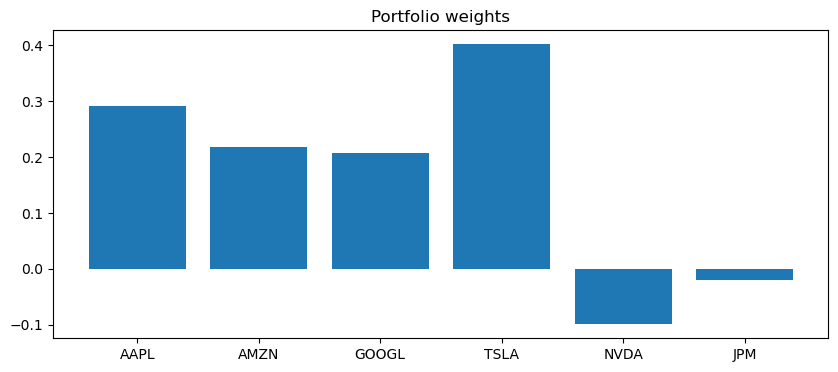

In [30]:
mu0 = 0.2 # Target portfolio expected return

w0 = weights
linConstraint = ({'type': 'eq', 'fun': lambda x: ptfRet(x,muBar) - mu0}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # x - 0.2 = 0 --> x = 0.2
res = minimize(ptfVar, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint)

print("Portfolio weights are:")
print(res.x)

ptf1_expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf1_expret)
ptf1_vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio volatility is:", ptf1_vol)
print("Sharpe ratio is:", ptf1_expret/ptf1_vol)

plot_weights(res.x)

###### No short sales

((0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0), (0.0, 1.0))
Portfolio weights are:
[0.31428692 0.         0.1128628  0.29918831 0.19325475 0.08040721]
Portfolio expected return is: [0.4]
Portfolio expected volatility is: 0.28529354677742774
Sharpe ratio is: [1.40206466]


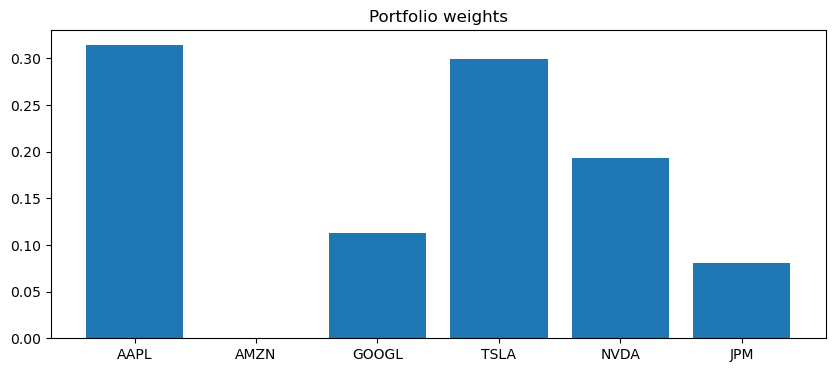

In [34]:
bound = (0.0,1.0) # no short selling constraint
bounds = tuple(bound for asset in range(len(assetList)))
print(bounds)

w0 = weights
mu0 = 0.4 # Target portfolio expected return
linConstraint = ({'type': 'eq', 'fun': lambda x: ptfRet(x,muBar) - mu0}, {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
res = minimize(ptfVar, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint, bounds=bounds, options={'ftol': 1e-09})

print("Portfolio weights are:")
print(res.x)

ptf1_2expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf1_2expret)
ptf1_2vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio expected volatility is:", ptf1_2vol)
print("Sharpe ratio is:", ptf1_2expret/ptf1_2vol)

plot_weights(res.x)

##### 4. Global Minimum variance portfolio 

###### Short sales allowed

In [35]:
w0 = weights
linConstraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
res = minimize(ptfVar, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint, options={'ftol': 1e-09})

print("Portfolio weights are:")
print(res.x)

Portfolio weights are:
[ 0.28890752  0.2372899   0.21473033  0.41062631 -0.12295302 -0.02860104]


In [36]:
ptf2_expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf2_expret)
ptf2_vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio expected volatility is:", ptf2_vol)
print("Sharpe ratio is:", ptf2_expret/ptf2_vol)

Portfolio expected return is: [0.18381229]
Portfolio expected volatility is: 0.23831644594013213
Sharpe ratio is: [0.77129503]


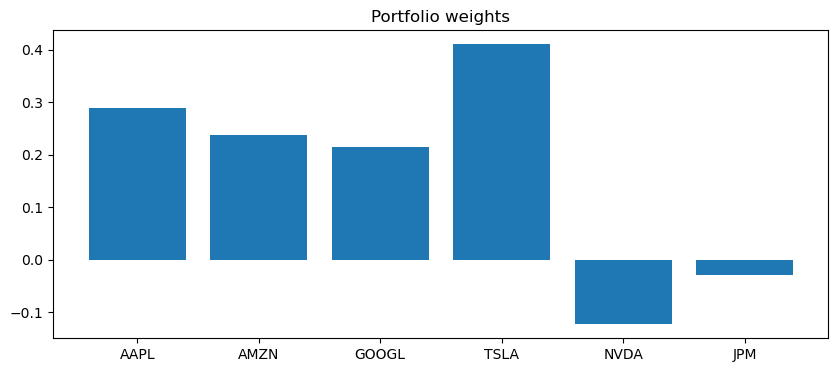

In [37]:
plot_weights(res.x)

###### No short sales

In [38]:
bound = (0.0,1.0) # no short selling constraint
bounds = tuple(bound for asset in range(len(assetList)))

w0 = weights
linConstraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
res = minimize(ptfVar, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint, bounds=bounds, options={'ftol': 1e-09})

print("Portfolio weights are:")
print(res.x)

Portfolio weights are:
[2.20734367e-01 1.86727202e-01 1.79866226e-01 4.12672204e-01
 3.57515666e-17 5.21772296e-19]


In [39]:
ptf2_2expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf2_2expret)
ptf2_2vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio expected volatility is:", ptf2_2vol)
print("Sharpe ratio is:", ptf2_2expret/ptf2_2vol)

Portfolio expected return is: [0.25204074]
Portfolio expected volatility is: 0.24417484602097256
Sharpe ratio is: [1.03221417]


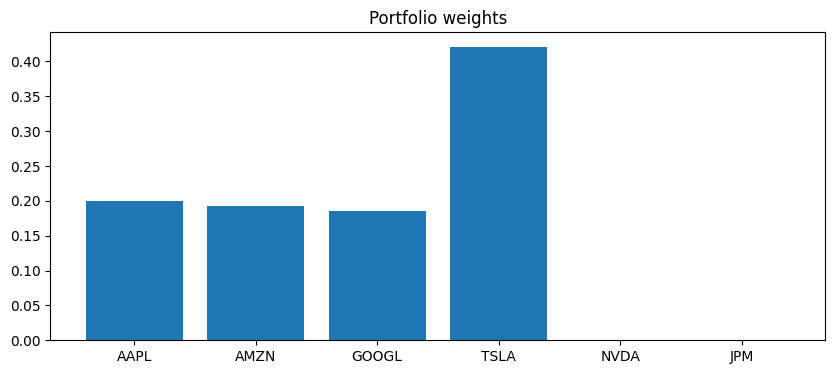

In [155]:
plot_weights(res.x)

##### 5. Max sharpe ratio portfolio

In [40]:
def max_sharpe(x,SigmaBar):
    return -ptfRet(x,muBar)/np.sqrt(ptfVar(x,SigmaBar))

###### Short sales allowed

In [41]:
w0 = weights
linConstraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
res = minimize(max_sharpe, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint, options={'ftol': 1e-09})

print("Portfolio weights are:")
print(res.x)

Portfolio weights are:
[ 0.36341982 -0.42354989 -0.05111495  0.10975776  0.73430139  0.26718588]


In [158]:
ptf3_expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf3_expret)
ptf3_vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio expected volatility is:", ptf3_vol)
print("Sharpe ratio is:", ptf3_expret/ptf3_vol)

Portfolio expected return is: [0.87234651]
Portfolio expected volatility is: 0.5489434792256498
Sharpe ratio is: [1.58913722]


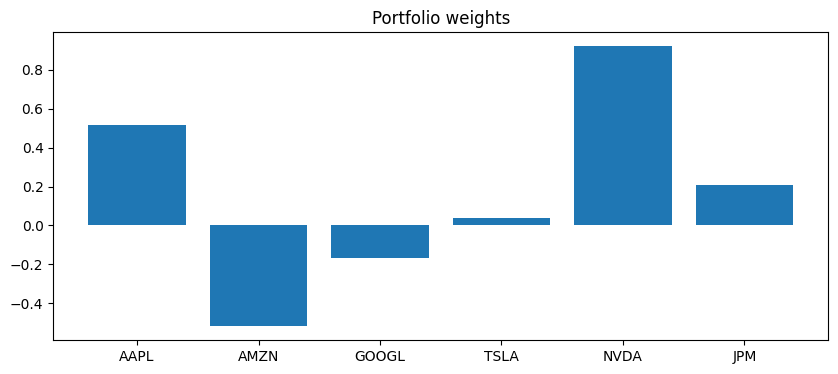

In [159]:
plot_weights(res.x)

###### No short sales

In [160]:
bound = (0.0,1.0) # no short selling constraint
bounds = tuple(bound for asset in range(len(assetList)))

w0 = weights
linConstraint = {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
res = minimize(max_sharpe, w0, args=SigmaBar, method='SLSQP', constraints=linConstraint, bounds=bounds, options={'ftol': 1e-09})

print("Portfolio weights are:")
print(res.x)

Portfolio weights are:
[2.04894833e-01 1.42829660e-16 0.00000000e+00 1.62498634e-02
 6.35881846e-01 1.42973457e-01]


In [161]:
ptf3_2expret = ptfRet(res.x,muBar)
print("Portfolio expected return is:", ptf3_2expret)
ptf3_2vol = np.sqrt(ptfVar(res.x,SigmaBar))
print("Portfolio expected volatility is:", ptf3_2vol)
print("Sharpe ratio is:", ptf3_2expret/ptf3_2vol)

Portfolio expected return is: [0.65568568]
Portfolio expected volatility is: 0.4289514314825591
Sharpe ratio is: [1.52857789]


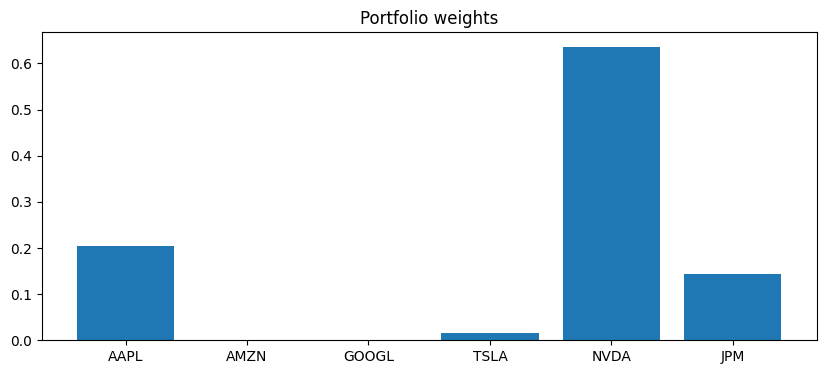

In [162]:
plot_weights(res.x)

##### 6. Efficient Portfolios and the Efficient frontier

In [163]:
# Efficient Frontier Construction - Numerical Method for Both Frontiers

# Define target expected returns for both scenarios
muRange_NS = np.linspace(ptf2_2expret, ptf3_2expret, 30)
muRange_S = np.linspace(ptf2_expret, ptf3_expret, 30)

# Set initial weights and constraints
w0 = weights

# No short-sell allowed efficient frontier (numerical)
ptfVarRangeNS = []
for el in muRange_NS:
    bounds = [(0.0, 1.0)] * len(assetList)  # No short selling constraint
    constraints = [
        {'type': 'eq', 'fun': lambda x: ptfRet(x, muBar) - el},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    ]
    res = minimize(ptfVar, w0, args=(SigmaBar,), method='SLSQP', bounds=bounds, constraints=constraints, options={'ftol': 1e-09})
    ptfVarRangeNS.append(ptfVar(res.x, SigmaBar))

# Short-sell allowed efficient frontier (numerical)
ptfVarRangeS = []
for el in muRange_S:
    constraints = [
        {'type': 'eq', 'fun': lambda x: ptfRet(x, muBar) - el},
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1}
    ]
    res = minimize(ptfVar, w0, args=(SigmaBar,), method='SLSQP', constraints=constraints, options={'ftol': 1e-09})
    ptfVarRangeS.append(ptfVar(res.x, SigmaBar))

# Convert ranges to arrays
muRange = np.vstack(muRange_NS)
ptfVarRangeNS = np.sqrt(ptfVarRangeNS)  # No short-sell frontier
ptfVarRangeS = np.sqrt(ptfVarRangeS)    # Short-sell frontier

In [164]:
# Monte Carlo Simulation for random portfolios
prets, pvols, psharpe = [], [], []
for _ in range(100000):
    weights = np.random.random(len(assetList))
    weights /= np.sum(weights)
    prets.append(ptfRet(weights, muBar))
    pvols.append(np.sqrt(ptfVar(weights, SigmaBar)))
    psharpe.append(max_sharpe(weights, SigmaBar))

# Convert lists to arrays for plotting
prets = np.array(prets)
pvols = np.array(pvols)
psharpe = np.array(psharpe)

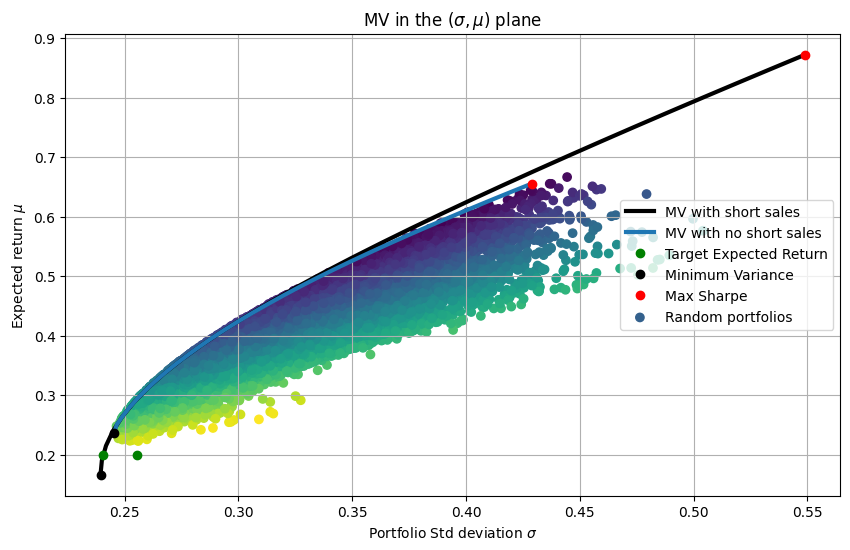

In [165]:
# Plot
plt.figure(figsize=(10, 6))
plt.plot(ptfVarRangeS, muRange_S, linewidth=3, color='k', label='MV with short sales')
plt.plot(ptfVarRangeNS, muRange_NS, linewidth=3, label='MV with no short sales')
plt.plot(ptf1_vol,ptf1_expret,"go", label="Target Expected Return")
plt.plot(ptf1_2vol,ptf1_2expret,"go")
plt.plot(ptf2_vol, ptf2_expret, "ko", label="Minimum Variance")
plt.plot(ptf2_2vol, ptf2_2expret, "ko")
plt.plot(ptf3_vol, ptf3_expret, "ro", label="Max Sharpe")
plt.plot(ptf3_2vol, ptf3_2expret, "ro")
plt.scatter(pvols, prets, c=psharpe, marker="o", cmap="viridis", label="Random portfolios")
plt.legend(loc='right')
plt.grid()
plt.title('MV in the $(\sigma,\mu)$ plane')
plt.ylabel('Expected return $\mu$')
plt.xlabel('Portfolio Std deviation $\sigma$')
plt.show()